In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_excel("C & F COMBINE.xlsx")

In [4]:
x = df.iloc[0:20,0:6]
y = df.iloc[0:20,-3]

In [5]:
x

,Days,%,Cement,F.A,C.A,HDPE
0,3,0,320,855,1199,0
1,3,2.5,323,833.63,1200,21.37
2,3,5,323,812.25,1200,42.75
3,3,7.5,323,790.88,1200,64.12
4,3,10,323,769.5,1200,85.5
5,7,0,320,855,1199,0
6,7,2.5,323,833.63,1200,21.37
7,7,5,323,812.25,1200,42.75
8,7,7.5,323,790.88,1200,64.12
9,7,10,323,769.5,1200,85.5


In [6]:
y

0        12.35
1        11.78
2        12.25
3        13.75
4        10.36
5        21.65
6        21.25
7        21.85
8        23.52
9        22.36
10       32.44
11       31.25
12       33.45
13       38.65
14       35.24
15       33.11
16    35.09375
17     36.3267
18     42.9015
19     38.4116
Name: CS- EXP, dtype: object

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [9]:
y_train.shape

(14,)

In [10]:
y_test.shape

(6,)

In [11]:
reg_model = linear_model.LinearRegression()

In [12]:
reg_model = LinearRegression().fit(X_train, y_train)

In [63]:
y_pred= reg_model.predict(X_test)  

In [64]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [25.46875   22.0703125 42.03125   18.609375  23.453125  19.9921875]


In [65]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
12,33.45,25.468750
4,10.36,22.070312
18,42.9015,42.031250
0,12.35,18.609375
9,22.36,23.453125
5,21.65,19.992188


In [66]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_Score = r2_score(y_test, y_pred)
score = reg_model.score(X_train, y_train)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('r2-Score:', r2)
print('Regression Model Score:', score)

Mean Absolute Error: 4.928687500000001
Mean Square Error: 40.78535756901042
Root Mean Square Error: 6.386341485468063
r2-Score: 6.386341485468063
Regression Model Score: 0.7454374300216211


In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [80]:
# Creating a meshgrid for the plane
x_values = np.linspace(min(x["Days"]), max(x["Days"]), 10)
y_values = np.linspace(min(x["HDPE"]), max(x["HDPE"]), 10)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

intercept=reg_model.intercept_
coef_Days,coef_HDPE = reg_model.coef_[0],reg_model.coef_[5]

In [81]:
## Calculating z values for the plane using the plane equation
z_mesh = coef_Days * x_mesh + coef_HDPE * y_mesh + intercept

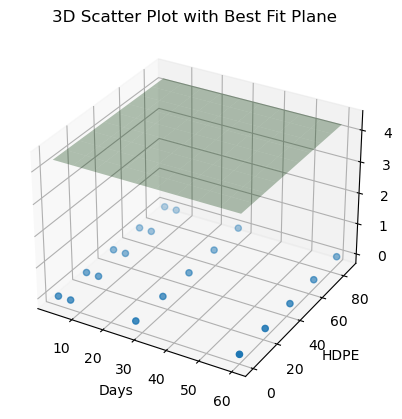

In [82]:
 # Plotting the scatter plot
 fig = plt.figure()
 ax = fig.add_subplot(projection='3d')
 ax.scatter(x["Days"], x["HDPE"], y)
 # Plotting the best fit plane
 ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha = 0.3, color='green')
 ax.set_xlabel('Days')
 ax.set_ylabel('HDPE')
 ax.set_zlabel('CS-EXP')
 ax.set_title('3D Scatter Plot with Best Fit Plane')
# ax.legend()
 plt.show()